## Multilayer Perceptron: Fit and evaluate a model

In this section, we will fit and evaluate a simple Multilayer Perceptron model.

In [6]:
import joblib 
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

**Loading the train features and lable**

In [8]:
tr_features = pd.read_csv("/content/drive/MyDrive/train_features.csv")
tr_labels = pd.read_csv("/content/drive/MyDrive/train_labels.csv", header=None)

In [3]:
def print_results(results):
  print("BEST PARAM {}\n".format(results.best_params_))

  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('{} (+/- {}) fro {}'.format(round(mean,3), round(std*2, 3), params))

### Hyperparameter tuning

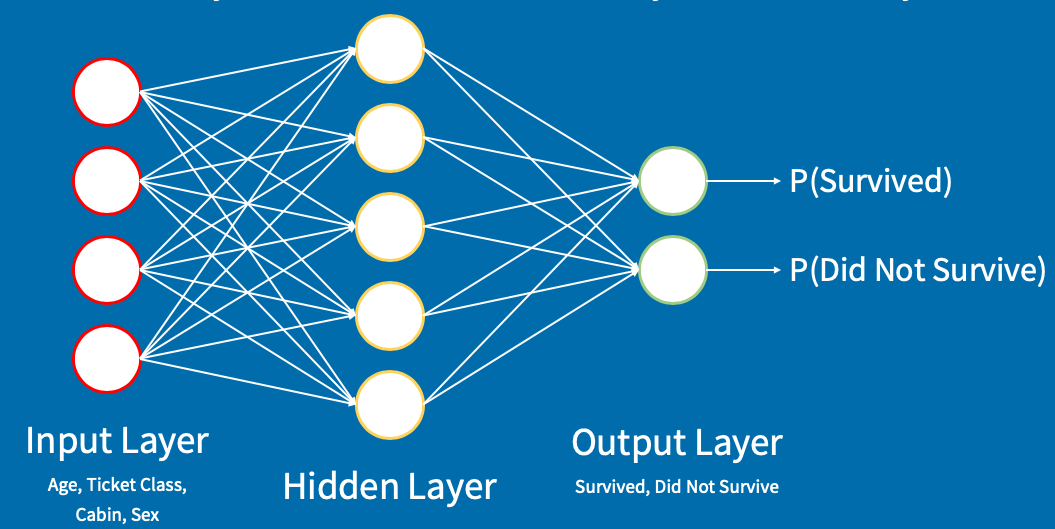

In [10]:
mlp = MLPClassifier()
parameters = {
    "hidden_layer_sizes": [(10,),(50,),(100,)],
    "activation": ["relu", 'tanh', 'logistic'],
    "learning_rate": ['constant', 'invscaling', 'adaptive']
}
cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


BEST PARAM {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}

0.732 (+/- 0.124) fro {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.742 (+/- 0.141) fro {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.682 (+/- 0.148) fro {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.805 (+/- 0.098) fro {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.785 (+/- 0.116) fro {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.79 (+/- 0.114) fro {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.802 (+/- 0.112) fro {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.805 (+/- 0.101) fro {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.781 (+/- 0.077) fro {'activation': 'relu', 'hidden_layer_sizes': (100,), '

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
cv.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

**Saving the model**

In [12]:
joblib.dump(cv.best_estimator_, "/content/drive/MyDrive/MLP_model.json")

['/content/drive/MyDrive/MLP_model.json']